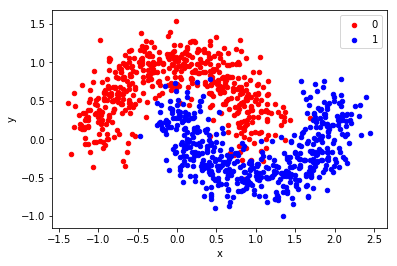

In [47]:
# Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import random
from pandas import DataFrame
random.seed(0)


# create a synthetic dataset 
'''
DO NOT CHANGE BELOW CODE 
'''


from sklearn.datasets import make_moons

num_observation = 1000
X, y = make_moons(n_samples=num_observation, noise=0.20, 
    random_state=0)
    
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()

grouped = df.groupby('label')
#plt.figure()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()



In [48]:
# create a function for prediction 
def predict(X, theta):
    '''
    @parameter1: input feature set
    @parameter2: model coefficients
    Does: calculate the dot product
    return: the dot product value
    '''
	# TODO: YOUR CODE GOES HERE 
    a = np.dot(X,theta.transpose())
    return a 

In [49]:
def sigmoid(z):
    '''
    @z : value to pass to the model
    return : the sigmoid value
    '''
	# TODO: YOUR CODE GOES HERE 
    a = 1/(1+np.exp(-z))
    return a

In [63]:
def gradient_descent(theta, X, y,_lambda = 0.01):
    '''
    @parameters: theta, input features , target vector
    Does: calculate the gradient given the parameters
    return: the gradient 
    '''

	# TODO: YOUR CODE GOES HERE 
    
  
    num=len(X)
    hypothesis = sigmoid(predict(X.T, theta))
    loss = hypothesis - y
    gradient = (np.dot(xTrans, loss)  + _lambda * theta )/num
        
    return gradient


In [65]:
df = np.asanyarray(df)
# using sklearn create the dataset with PolynomialFeatures degree 6 
from sklearn.preprocessing import PolynomialFeatures
# TODO: YOUR CODE GOES HERE 
poly = PolynomialFeatures(degree=6)
poly_nomial_data = poly.fit_transform(df[:,(0,1)])

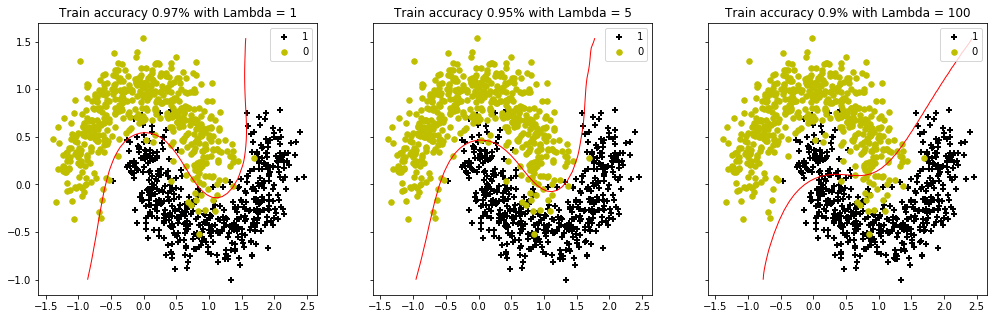

In [69]:
# DO NOT CHANGE BELOW CODE 
m, n = poly_nomial_data.shape
initial_theta = np.zeros(n)
learning_rate = 0.01

 
 
# DO NOT CHANGE BELOW CODE 

def plotData(data, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes, object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=30, 
    	linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=30, label=label_neg)
    axes.legend(frameon= True, fancybox = True);






fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

'''
Using following lambda variables [1, 5, 100] and learning rate of 0.01, iterate 
over your polynomial dataset and calculate the weights for each given lambda. 
Then using the function plotData plot your dataset and the decision boundary. 
'''

# TODO: YOUR CODE GOES HERE 

for i, c in enumerate([1, 5, 100]): 
    m, n = poly_nomial_data.shape
    learning_rate = 0.01
    initial_theta = np.zeros(n)
    
    
    for j in range(100000):
        initial_theta=initial_theta-learning_rate*gradient_descent(initial_theta, poly_nomial_data, y,c)
        
        ''' your code goes here - calculate the gradient and cost for initial theta 
               and update your theta
         '''
            
# calculate accuracy and save it in variable names accuracy using threshold 
    # of 0.5 for your predictions 
    # Your code goes here
	# TODO: YOUR CODE GOES HERE     
    Pre=predict(poly_nomial_data,initial_theta)
    Y_test=sigmoid(Pre)
    for k in range(len(Y_test)):
        if Y_test[k]>=0.5:
            Y_test[k]=1
        else:
            Y_test[k]=0
    dif = y - Y_test
    number =str(dif.tolist()).count("0.")
    accuracy = number / len(Y_test)
    
    plotData(df, 1, 0, axes.flatten()[i])
    # Plot decision boundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min,x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(initial_theta))
    h = h.reshape(xx1.shape)
    
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='r');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), c))
